In [108]:
# Requires 0.24
import os
import sys
sys.path.insert(1,os.path.abspath('../0. Not_git/Sources/scikit-learn/0.24.0'))
import sklearn
print(sklearn.__version__)
#this will be 0.24.2 

0.24.0


### Load Data

In [109]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/Output_files/'

# Load files into a pandas dataframes
file = path + '2.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date").asfreq('MS')

# Dependant variable 
dep_var = 'Orders'

In [110]:
df

,Orders,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV,Orders_lagged_12m,LTIR_lagged_3m,CCI_lagged_3m,...,Orders_rolled_detrended,Orders_rolled_detrended_diff,CPI_rolled_detrended,CPI_rolled_detrended_diff,TIV_rolled_detrended,TIV_rolled_detrended_diff,Long_term_interest_rates_rolled_detrended,Long_term_interest_rates_rolled_detrended_diff,Avg_Fuel_Price_rolled_detrended,Avg_Fuel_Price_rolled_detrended_diff
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,998,101.06670,2.302302,7.2,4.050000,1.120000,18851,1124,3.840000,100.73080,...,70.833333,293.500000,996.309473,282.875414,-12305.500000,393.500000,994.153333,282.935833,996.793056,283.004167
2007-02-01,638,100.98060,2.184707,7.2,4.080000,1.133333,11852,1079,3.750000,100.98190,...,-252.416667,-323.250000,636.202564,-360.106909,-12582.750000,-277.250000,634.100000,-360.053333,636.797500,-359.995556
2007-03-01,649,100.94160,2.574257,7.1,3.980000,1.183333,14386,1210,3.820000,101.07590,...,-194.666667,57.750000,647.062968,10.860404,-12507.000000,75.750000,645.070000,10.970000,647.797222,10.999722
2007-04-01,753,100.98700,2.561576,6.5,4.200000,1.203333,13761,1147,4.050000,101.06670,...,-57.833333,136.833333,750.957620,103.894652,-12427.083333,79.916667,749.043333,103.973333,751.800556,104.003333
2007-05-01,856,100.99110,2.362205,6.6,4.330000,1.236667,14917,1001,4.080000,100.98060,...,57.250000,115.083333,853.902578,102.944958,-12190.833333,236.250000,852.010833,102.967500,854.802500,103.001944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,254,94.58021,7.616082,7.2,1.624904,2.153333,8163,256,1.451962,95.99666,...,-0.916667,136.166667,248.716502,135.546119,-7539.500000,198.583333,253.218066,135.846670,251.932778,135.961667
2022-09-01,228,94.10754,8.119296,7.3,2.420836,2.133333,7867,259,2.072276,95.42986,...,-24.333333,-23.416667,222.247203,-26.469299,-7588.250000,-48.750000,227.009341,-26.208725,225.895000,-26.037778
2022-10-01,188,93.96142,8.310766,6.4,2.894486,2.136667,7132,178,1.713857,94.96820,...,-65.166667,-40.833333,181.817941,-40.429262,-7592.916667,-4.666667,186.774708,-40.234633,185.864444,-40.030556


### Split Data

In [111]:
# Split data
steps = 36  # Number of months of testing
train = df[:-steps]
test  = df[-steps:]

print(f"Dataset length : (n={len(df)})")
print(f"Train dates    : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates     : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

start = train.index.min()
end = df.index.max()
start_test = test.index.min()

start, end, start_test

Dataset length : (n=192)
Train dates    : 2007-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=156)
Test dates     : 2020-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=36)


(Timestamp('2007-01-01 00:00:00', freq='MS'),
 Timestamp('2022-12-01 00:00:00', freq='MS'),
 Timestamp('2020-01-01 00:00:00', freq='MS'))

In [112]:
# Define exogenous variables
df_exo = df[df.columns.difference([dep_var])]
train_exo = train[train.columns.difference([dep_var])]
test_exo = test[test.columns.difference([dep_var])]

In [113]:
train_exo

,AFP_lagged_3m,AFP_lagged_4m,AFP_lagged_5m,Avg_Fuel_Price,Avg_Fuel_Price_rolled_detrended,Avg_Fuel_Price_rolled_detrended_diff,CCI,CCI_lagged_3m,CCI_lagged_4m,CCI_lagged_5m,...,Orders_lagged_12m,Orders_rolled_detrended,Orders_rolled_detrended_diff,TIV,TIV_rolled_detrended,TIV_rolled_detrended_diff,UR_lagged_3m,UR_lagged_4m,UR_lagged_5m,Unemployment_rate
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,1.163333,1.203333,1.283333,1.120000,996.793056,283.004167,101.06670,100.73080,100.56660,100.47240,...,1124,70.833333,293.500000,18851,-12305.500000,393.500000,7.7,7.6,7.7,7.2
2007-02-01,1.150000,1.163333,1.203333,1.133333,636.797500,-359.995556,100.98060,100.98190,100.73080,100.56660,...,1079,-252.416667,-323.250000,11852,-12582.750000,-277.250000,7.3,7.7,7.6,7.2
2007-03-01,1.146667,1.150000,1.163333,1.183333,647.797222,10.999722,100.94160,101.07590,100.98190,100.73080,...,1210,-194.666667,57.750000,14386,-12507.000000,75.750000,7.1,7.3,7.7,7.1
2007-04-01,1.120000,1.146667,1.150000,1.203333,751.800556,104.003333,100.98700,101.06670,101.07590,100.98190,...,1147,-57.833333,136.833333,13761,-12427.083333,79.916667,7.2,7.1,7.3,6.5
2007-05-01,1.133333,1.120000,1.146667,1.236667,854.802500,103.001944,100.99110,100.98060,101.06670,101.07590,...,1001,57.250000,115.083333,14917,-12190.833333,236.250000,7.2,7.2,7.1,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.563333,1.543333,1.496667,1.510000,541.472500,86.002500,98.93536,99.80579,100.01960,100.03690,...,1107,50.166667,133.000000,11611,-9808.916667,207.583333,6.8,7.2,6.5,7.0
2019-09-01,1.546667,1.563333,1.543333,1.523333,482.475000,-58.997500,98.81007,99.39902,99.80579,100.01960,...,394,-16.333333,-66.500000,9375,-10003.666667,-194.750000,6.2,6.8,7.2,6.7
2019-10-01,1.533333,1.546667,1.563333,1.523333,372.479444,-109.995556,98.74165,99.12035,99.39902,99.80579,...,379,-125.916667,-109.583333,10495,-10213.916667,-210.250000,6.5,6.2,6.8,6.9


### Scoring function

In [114]:
# Importing the metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the modules
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objs as go

metrics = pd.DataFrame()

def scoring(model_name, y_true, y_pred):
    
    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)                      # MAE (Mean Absolute Error)
    mse = mean_squared_error(y_true, y_pred)                       # MSE (Mean Squared Error)
    rmse = math.sqrt(mse)                                          # RMSE (Root Mean Squared Error)
    r2 = r2_score(y_true, y_pred)                                  # R2 (R-squared - Coeficient of determination)                           
    mape = np.mean(np.abs((y_true - y_pred) /y_true)) * 100        # MAPE
    accuracy = 100 - mape                                          # Accuracy

    # Append metrics for summary
    metrics[model_name] = [mae, mse, rmse, r2, mape, accuracy]
    metrics.index = ['Mean Absolute Error', 
                    'Mean Squared Error', 
                    'Root Mean Squared Error',
                    'R^2',
                    'Mean Absolute Percentage Error',
                    'Accuracy']
    
    # Print metrics  
    print(model_name, 'Model Performance:')                             # Model name
    print('Mean Absolute Error: {:0.2f}.'.format(mae))                  # MAE
    print('Mean Squared Error: {:0.2f}.'.format(mse))                   # MSE
    print('Root Mean Squared Error: {:0.2f}.'.format(rmse))             # RMSE  
    print('R^2 Score = {:0.2f}.'.format(r2))                            # R2
    print('Mean Absolute Percentage Error: {:0.2f}%.'.format(mape))     # MAPE 
    print('Accuracy = {:0.2f}%.'.format(accuracy))                      # Accuracy

    df = pd.DataFrame(y_true)
        
    # Plot Actual values vs predicted values
    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=df.index, y=y_true, mode='lines+markers', name= 'Actual')))
    fig.add_trace(go.Scatter(dict(x=df.index, y=y_pred, mode='lines+markers', name= 'Predicted')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions with ' + model_name,
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
    fig.show() 

def plot_time_series(preds):

    fig= go.Figure()
    fig.add_trace(go.Scatter(dict(x=train.index, y=train[dep_var], mode='lines+markers', name= 'Train')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=test[dep_var], mode='lines+markers', name= 'Test')))
    fig.add_trace(go.Scatter(dict(x=test.index, y=preds, mode='lines+markers', name= 'Forecast')))
    fig.update_layout(title=go.layout.Title(
        text='Actual vs Predictions',
        xref='paper',x=0),
        margin=dict(l=10, r=0, t=50, b=50),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars')))
    fig.show() 

### AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = AdaBoostRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = AdaBoostRegressor(),
                lags      = 12
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: AdaBoostRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['AFP_lagged_3m', 'AFP_lagged_4m', 'AFP_lagged_5m', 'Avg_Fuel_Price', 'Avg_Fuel_Price_rolled_detrended', 'Avg_Fuel_Price_rolled_detrended_diff', 'CCI', 'CCI_lagged_3m', 'CCI_lagged_4m', 'CCI_lagged_5m', 'CPI', 'CPI_lagged_3m', 'CPI_lagged_4m', 'CPI_lagged_5m', 'CPI_rolled_detrended', 'CPI_rolled_detrended_diff', 'LTIR_lagged_3m', 'LTIR_lagged_4m', 'LTIR_lagged_5m', 'Long_term_interest_rates', 'Long_term_interest_rates_rolled_detrended', 'Long_term_interest_rates_rolled_detrended_diff', 'Orders_lagged_12m', 'Orders_rolled_detrended', 'Orders_rolled_detrended_diff', 'TIV', 'TIV_rolled_detrended', 'TIV_rolled_detrended_diff', 'UR_lagged_3m', 'UR_lagged_4m', 'UR_lagged_5m', 'U

#### Baseline predictions

In [116]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

AdaBoostRegressor Model Performance:
Mean Absolute Error: 55.96.
Mean Squared Error: 4559.79.
Root Mean Squared Error: 67.53.
R^2 Score = 0.52.
Mean Absolute Percentage Error: 25.40%.
Accuracy = 74.60%.


#### Hyperparameter Tuning

In [117]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = AdaBoostRegressor(),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
n_estimators = [100, 500]
learning_rate = [0.01, 0.1, 0.3]
loss = ['linear', 'square', 'exponential']

# Create the grid
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'loss': loss  
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 36.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:30<00:00, 45.24s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6] 
  Parameters: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 500}
  Backtesting metric: 326.1026179621231



In [118]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,learning_rate,loss,n_estimators
9,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.1, 'loss': 'square', 'n_es...",326.102618,0.1,square,500
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.3, 'loss': 'exponential', ...",392.464026,0.3,exponential,500
13,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.3, 'loss': 'linear', 'n_es...",395.191625,0.3,linear,500
17,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.3, 'loss': 'exponential', ...",395.256580,0.3,exponential,500
31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.3, 'loss': 'linear', 'n_es...",408.261229,0.3,linear,500


In [119]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

AdaBoostRegressor Tuned Model Performance:
Mean Absolute Error: 15.68.
Mean Squared Error: 371.00.
Root Mean Squared Error: 19.26.
R^2 Score = 0.96.
Mean Absolute Percentage Error: 6.75%.
Accuracy = 93.25%.


#### Featrue Importance

In [121]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
10,Avg_Fuel_Price_rolled_detrended,0.328970
20,CPI_rolled_detrended,0.326255
26,Long_term_interest_rates_rolled_detrended,0.321987
29,Orders_rolled_detrended,0.008883
11,Avg_Fuel_Price_rolled_detrended_diff,0.001757
1,lag_2,0.001362
30,Orders_rolled_detrended_diff,0.001085
27,Long_term_interest_rates_rolled_detrended_diff,0.000931
15,CCI_lagged_5m,0.000896
21,CPI_rolled_detrended_diff,0.000877


### LightGBM

In [38]:
# Import LightGBM Regressor
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = LGBMRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(),
                lags      = 7
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor() 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', 'CCI', 'CPI', 'Long_term_interest_rates', 'Orders_rolled_detrended', 'TIV', 'Unemployment_rate'] 
Training range: [Timestamp('2006-12-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsa

#### Baseline predictions

In [39]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

LGBMRegressor Model Performance:
Mean Absolute Error: 240.14.
Mean Squared Error: 64936.92.
Root Mean Squared Error: 254.83.
R^2 Score = -5.78.
Mean Absolute Percentage Error: 92.35%.
Accuracy = 7.65%.


#### Hyperparameter Tuning

In [40]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = LGBMRegressor(random_state=42),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
lgbm_n_estimators = [100, 500, 1000]
lgbm_max_depth = [4, 6, 8]
lgbm_num_leaves = [3, 5, 7]
lgbm_learning_rate = [0.01, 0.1, 0.3]
#lgbm_subsample = [0.3, 0.2, 0.1]

# Create the grid
param_grid = {'n_estimators': lgbm_n_estimators,
            'max_depth': lgbm_max_depth,
            'num_leaves': lgbm_num_leaves,
            'learning_rate': lgbm_learning_rate,
 #           'subsample': lgbm_learning_rate
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 162.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:46<00:00, 23.17s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6] 
  Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'num_leaves': 3}
  Backtesting metric: 7567.737554922676



In [41]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,learning_rate,max_depth,n_estimators,num_leaves
30,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",7567.737555,0.1,4.0,500.0,3.0
48,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",7567.737555,0.1,8.0,500.0,3.0
39,"[1, 2, 3, 4, 5, 6]","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",7567.737555,0.1,6.0,500.0,3.0
117,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",7764.682744,0.1,6.0,100.0,3.0
126,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",7764.682744,0.1,8.0,100.0,3.0


In [42]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

LGBMRegressor Tuned Model Performance:
Mean Absolute Error: 240.82.
Mean Squared Error: 65402.13.
Root Mean Squared Error: 255.74.
R^2 Score = -5.83.
Mean Absolute Percentage Error: 91.00%.
Accuracy = 9.00%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 13
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-12-01 00:00:00 -- 2007-12-01 00:00:00  (n=13)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-12-01 00:00:00 -- 2010-12-01 00:00:00  (n=49)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-12-01 00:00:00 -- 2013-12-01 00:00:00  (n=85)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-12-01 00:00:00 -- 2016-12-01 00:00:00  (n=121)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-12-01 00:00:00 -- 2019-12-01 00:00:00  (n=157)
    Validation: 2020-01-01 00:00:00 

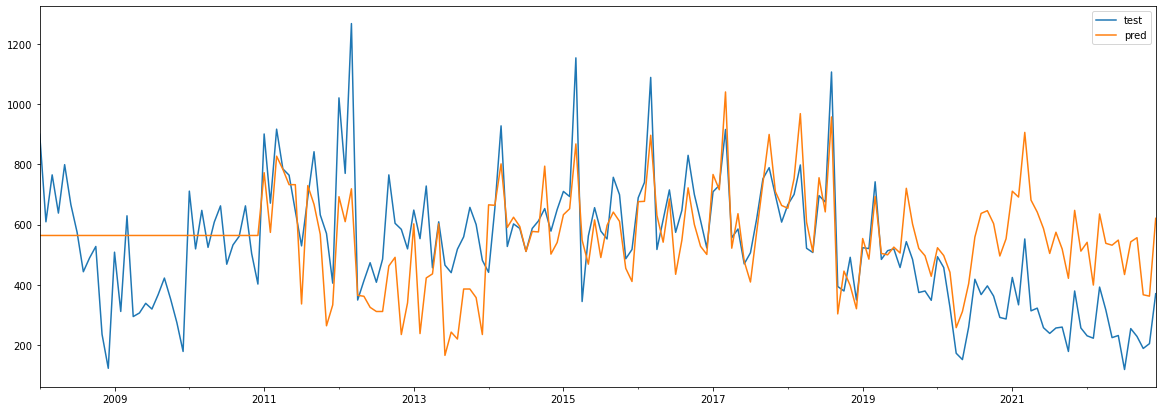

In [43]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster

# Se separan para el backtest los últimos 3 años
n_backtesting = 12*15

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend();

#### Feature importance

In [44]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
10,Orders_rolled_detrended,116
8,CPI,102
5,lag_6,89
4,lag_5,79
0,lag_1,77
2,lag_3,73
3,lag_4,72
9,Long_term_interest_rates,72
11,TIV,72
1,lag_2,70


### Extra Tree

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
          
# Instantiate the regressor
model = ExtraTreesRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = ExtraTreesRegressor(),
                lags      = 12
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: ExtraTreesRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', 'CCI', 'CPI', 'Long_term_interest_rates', 'Orders_rolled_detrended', 'TIV', 'Unemployment_rate'] 
Training range: [Timestamp('2006-12-01 00:00:00'), Timestamp('2019-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_star

#### Baseline Predictions

In [46]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

ExtraTreesRegressor Model Performance:
Mean Absolute Error: 232.30.
Mean Squared Error: 57944.06.
Root Mean Squared Error: 240.72.
R^2 Score = -5.05.
Mean Absolute Percentage Error: 91.18%.
Accuracy = 8.82%.


#### Hyperparameter Tuning

In [47]:
regressor = ExtraTreesRegressor()
regressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = ExtraTreesRegressor(),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
max_depth = [4, 6, 8]
min_samples_split = [3, 5, 7]
max_features = ['auto', 'sqrt', 'log2']


# Create the grid
param_grid = {
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'max_features': max_features
           }

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 54.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:49<00:00, 24.65s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 3}
  Backtesting metric: 6436.975231785823



In [49]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,max_depth,max_features,min_samples_split
36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 6, 'max_features': 'auto', 'min_...",6436.975232,6,auto,3
47,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 8, 'max_features': 'auto', 'min_...",6957.995751,8,auto,7
45,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 8, 'max_features': 'auto', 'min_...",6974.603260,8,auto,3
38,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 6, 'max_features': 'auto', 'min_...",7256.492674,6,auto,7
46,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'max_depth': 8, 'max_features': 'auto', 'min_...",7541.471209,8,auto,5


In [50]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

ExtraTreesRegressor Tuned Model Performance:
Mean Absolute Error: 255.87.
Mean Squared Error: 69680.86.
Root Mean Squared Error: 263.97.
R^2 Score = -6.28.
Mean Absolute Percentage Error: 100.73%.
Accuracy = -0.73%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 13
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-12-01 00:00:00 -- 2007-12-01 00:00:00  (n=13)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-12-01 00:00:00 -- 2010-12-01 00:00:00  (n=49)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-12-01 00:00:00 -- 2013-12-01 00:00:00  (n=85)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-12-01 00:00:00 -- 2016-12-01 00:00:00  (n=121)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-12-01 00:00:00 -- 2019-12-01 00:00:00  (n=157)
    Validation: 2020-01-01 00:00:00 

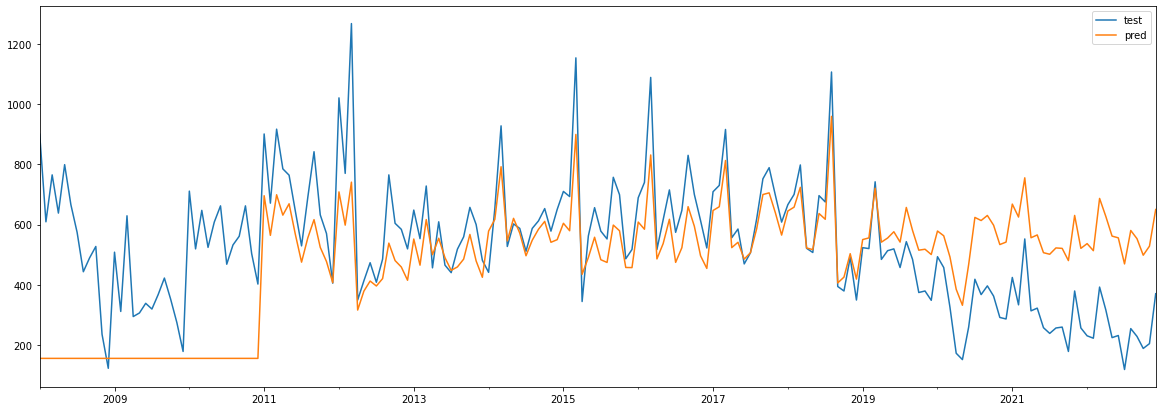

In [51]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster

# Se separan para el backtest los últimos 3 años
n_backtesting = 12*15

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend()

#### Feature importance

In [52]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,Orders_rolled_detrended,0.681915
17,TIV,0.088672
12,Avg_Fuel_Price,0.052108
15,Long_term_interest_rates,0.024483
11,lag_12,0.024240
0,lag_1,0.023491
9,lag_10,0.012883
8,lag_9,0.011882
10,lag_11,0.010158
7,lag_8,0.009323


### XGBoost

In [53]:
# Import XGBRegressor
from xgboost import XGBRegressor 
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Instantiate the regressor
model = XGBRegressor()

# Create forecaster
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(),
                lags      = 7
             )

# Train forecaster
forecaster.fit(y=train[dep_var], exog=train_exo)
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Avg_Fuel_Price', '

#### Baseline Predictions

In [54]:
# Predict and score
model_name = model.__class__.__name__
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

XGBRegressor Model Performance:
Mean Absolute Error: 196.33.
Mean Squared Error: 43667.64.
Root Mean Squared Error: 208.97.
R^2 Score = -3.56.
Mean Absolute Percentage Error: 78.11%.
Accuracy = 21.89%.


#### Hyperparameter Tuning

In [55]:
# Hyperparameter Grid search
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=42),
                lags      = 12 # Este valor será remplazado en el grid search
             )

lags_grid = [6,12]

# Set hyperparameters possibilities for model tuning
xgb_n_estimators = [50, 100, 500]
xgb_max_depth = [4, 6, 8]
xgb_min_child_weight = [1, 3, 5]
xgb_eta = [0.01, 0.1, 0.3]

# Create the grid
param_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'eta': xgb_eta
            }                   

grid_results = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train[dep_var],
                        exog               = train_exo,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                    )

Number of models compared: 162.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [01:23<00:00, 41.76s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'eta': 0.3, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100}
  Backtesting metric: 5127.257598717532



In [56]:
# Grid Search Results
grid_results.head()

,lags,params,mean_squared_error,eta,max_depth,min_child_weight,n_estimators
136,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.3, 'max_depth': 4, 'min_child_weight...",5127.257599,0.3,4.0,1.0,100.0
137,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.3, 'max_depth': 4, 'min_child_weight...",5127.267146,0.3,4.0,1.0,500.0
135,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.3, 'max_depth': 4, 'min_child_weight...",5134.374948,0.3,4.0,1.0,50.0
109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.1, 'max_depth': 4, 'min_child_weight...",5322.604084,0.1,4.0,1.0,100.0
110,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'eta': 0.1, 'max_depth': 4, 'min_child_weight...",5342.184918,0.1,4.0,1.0,500.0


In [57]:
# Predict and score
model_name = model.__class__.__name__ + ' Tuned'
preds = forecaster.predict(steps=steps, exog=test_exo)
scoring(model_name, test[dep_var], preds)

# Plot whole TS
plot_time_series(preds)

XGBRegressor Tuned Model Performance:
Mean Absolute Error: 204.27.
Mean Squared Error: 46608.01.
Root Mean Squared Error: 215.89.
R^2 Score = -3.87.
Mean Absolute Percentage Error: 80.94%.
Accuracy = 19.06%.


#### Backtesting

Information of backtesting process
----------------------------------
Number of observations used for initial training: 13
Number of observations used for backtesting: 180
    Number of folds: 5
    Number of steps per fold: 36

Data partition in fold: 0
    Training:   2006-12-01 00:00:00 -- 2007-12-01 00:00:00  (n=13)
    Validation: 2008-01-01 00:00:00 -- 2010-12-01 00:00:00  (n=36)
Data partition in fold: 1
    Training:   2006-12-01 00:00:00 -- 2010-12-01 00:00:00  (n=49)
    Validation: 2011-01-01 00:00:00 -- 2013-12-01 00:00:00  (n=36)
Data partition in fold: 2
    Training:   2006-12-01 00:00:00 -- 2013-12-01 00:00:00  (n=85)
    Validation: 2014-01-01 00:00:00 -- 2016-12-01 00:00:00  (n=36)
Data partition in fold: 3
    Training:   2006-12-01 00:00:00 -- 2016-12-01 00:00:00  (n=121)
    Validation: 2017-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=36)
Data partition in fold: 4
    Training:   2006-12-01 00:00:00 -- 2019-12-01 00:00:00  (n=157)
    Validation: 2020-01-01 00:00:00 

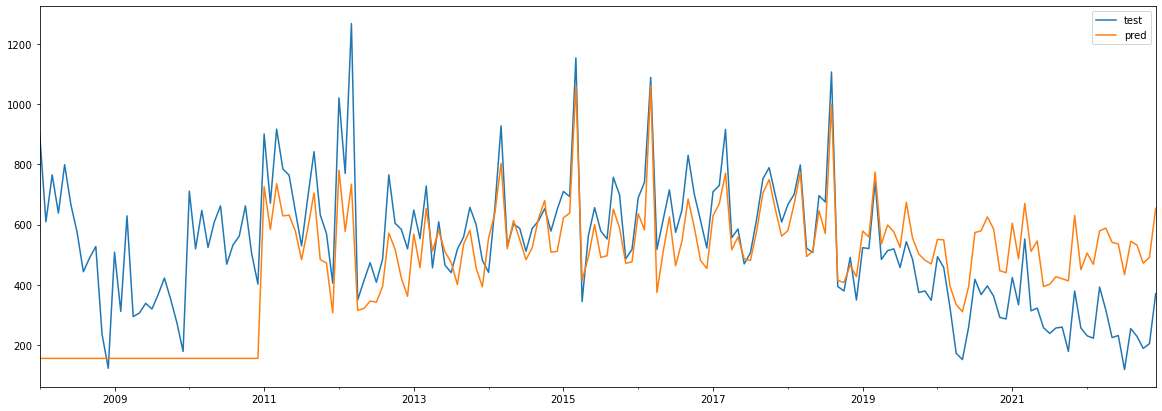

In [58]:
# Backtesting
from skforecast.model_selection import backtesting_forecaster
n_backtesting = 12*15 # Se separan para el backtest los últimos 9 años

metric, backtest_pred = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = df[dep_var],
                                    exog               = df_exo,
                                    initial_train_size = len(df) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    refit              = True,
                                    metric             = 'mean_squared_error',
                                    verbose            = True
                                 )

print(f"Error de backtest: {metric}")

fig, ax = plt.subplots(figsize=(20, 7))
df.loc[backtest_pred.index, dep_var].plot(ax=ax, label='test')
backtest_pred.plot(ax=ax, label='predicciones')
ax.legend();

#### Feature importance

In [59]:
# Feature importance
feature_importance = forecaster.get_feature_importance().sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
16,Orders_rolled_detrended,0.642146
12,Avg_Fuel_Price,0.165385
17,TIV,0.049583
6,lag_7,0.033540
8,lag_9,0.025756
15,Long_term_interest_rates,0.025147
10,lag_11,0.011647
11,lag_12,0.011145
2,lag_3,0.007358
0,lag_1,0.006126


### Summary

In [60]:
metrics

,AdaBoostRegressor,AdaBoostRegressor Tuned,LGBMRegressor,LGBMRegressor Tuned,ExtraTreesRegressor,ExtraTreesRegressor Tuned,XGBRegressor,XGBRegressor Tuned
Mean Absolute Error,246.597526,244.001733,240.142343,240.823522,232.304444,255.868613,196.330039,204.273009
Mean Squared Error,64943.878504,62901.316284,64936.916185,65402.126781,57944.058228,69680.859726,43667.635694,46608.009692
Root Mean Squared Error,254.840889,250.801348,254.827228,255.738395,240.715721,263.971324,208.968026,215.888883
R^2,-5.782972,-5.569640,-5.782245,-5.830834,-5.051886,-6.277720,-3.560805,-3.867908
Mean Absolute Percentage Error,96.247935,95.124578,92.346762,90.999487,91.176650,100.725557,78.112441,80.939278
Accuracy,3.752065,4.875422,7.653238,9.000513,8.823350,-0.725557,21.887559,19.060722
